In [1]:
#Importing lib.
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])

## Equation of Forced oscillator
$$\ddot x+2 b \dot x + \omega ^2 x = f_d \cos(\omega_d t)$$

In [2]:
def Forced_Oscillator(t, x, v, tf,h ,b , w, f_d, w_d):
    #Diffantial equation
    def f(x, v, t):
        return -2*b*v - w**2*x + f_d*np.cos(w_d*t)
    #Empty lists
    tt, xx = [], []
    while (t - tf <= h):
        tt.append(t)
        xx.append(x)
        x += h*v
        v += h*f(x, v, t)
        t += h
    return tt, xx

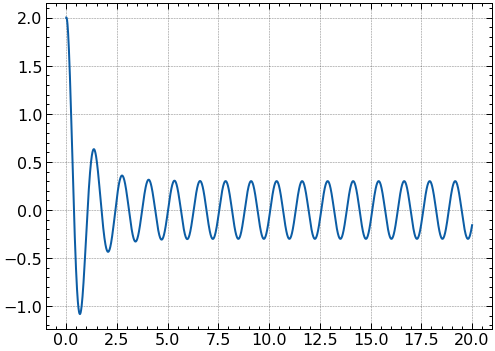

In [12]:
t = 0.01; x = 2; v = 0; tf = 20; h = 0.01; b = 1; w = 5; f_d = 3; w_d = 5

tim, dis = Forced_Oscillator(t, x, v, tf,h ,b , w, f_d, w_d)

plt.figure(figsize=(8,6))
plt.plot(tim, dis)
plt.show()

In [ ]:
g